# 8o Lab de PSD (notebook para preencher com os resultados)

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

### Número do Grupo : `Grupo 8`

In [2]:
#
# Primeiro vamos importar as bibliotecas necessárias
#
import numpy as np
import matplotlib.pyplot as plt
import cv2

# **1.0 - Filtro de Gabor 2D (domínio espacial)**

O filtro de Gabor é um filtro do tipo passa-banda que possui alguns parâmetros que permitem que ele possa ser ajustado para realçar informações com diferentes escalas e orientações em uma imagem. A sua **forma geral complexa** é dada pela equação abaixo.

$$\begin{aligned}
\psi(x,y; f_o, \theta, \sigma_x, \sigma_y) = \frac{f_o^2}{\pi \sigma_x \sigma_y} \exp \left(-\frac{f_o^2}{\sigma_x^2}x'^2 - \frac{f_o^2}{\sigma_y^2}y'^2 \right) \exp\left( j 2\pi f_o x' \right)
\end{aligned}$$

$$\begin{aligned}
x'&= x\cos\theta + y\sin\theta\\
y'&=-x\sin\theta + y\cos\theta\\
\end{aligned}$$

$f_o$ = frequência da onda senoidal

$\theta$ = ângulo de orientação do filtro

$\sigma_x$ e $\sigma_y$ = os desvios padrão da Gaussiana 2D  

## **1.1 - Implementação do filtro de Gabor 2D complexo - domínio espacial**

Implemente o filtro de Gabor 2D (no domínio espacial) usando a equação fornecida acima.

In [3]:
#
# Complex Gabor filter - image domain
#
def Gabor_image_domain(M,N,fo,theta,sigma_x,sigma_y):
    x = np.linspace(-M//2, M//2, M)
    y = np.linspace(-N//2, N//2, N)

    xx, yy = np.meshgrid(x,y)

    x_bar = xx*np.cos(theta) + yy*np.sin(theta)
    y_bar = -xx*np.sin(theta) + yy*np.cos(theta)

    gab = (fo**2/(np.pi*sigma_x*sigma_y))*np.exp(-(((fo**2)/(sigma_x**2))*x_bar**2)-(((fo**2)/(sigma_y**2))*y_bar**2))*np.exp(1j*2*np.pi*fo*x_bar)
   
    return gab

## **1.2 - Criação de um filtro de Gabor 2D**

Crie um filtro de Gabor 2D com os parâmetros fornecidos a seguir e plote as partes par e ímpar do filtro complexo. 

In [4]:
M = 32
N = 32
wavelength = 6 # 5 pixels
frequency = 1.0/wavelength 
theta = -np.pi/4

sigma_x = 0.6
sigma_y = 1.2

g = Gabor_image_domain(M,N,frequency,theta,sigma_x,sigma_y)
g_pair = np.real(g)
g_odd = np.imag(g)

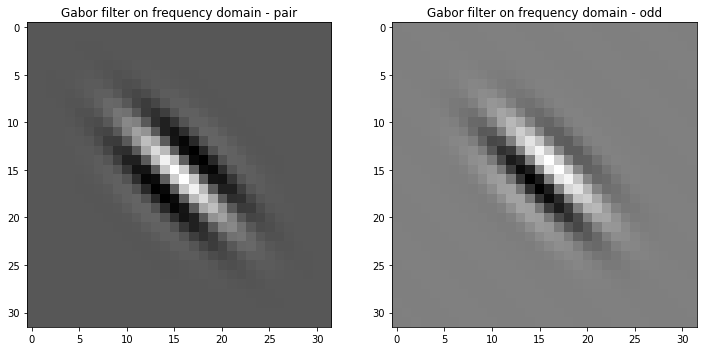

In [5]:
#
# Plote os filtros de Gabor 2D par e ímpar
#
plt.figure(figsize=(12,12))

plt.subplot(1, 2, 1)
plt.imshow(g_pair, cmap = 'gray')
plt.title('Gabor filter on frequency domain - pair')
plt.subplot(1, 2, 2)
plt.imshow(g_odd, cmap = 'gray')
plt.title('Gabor filter on frequency domain - odd')
plt.show()

## **1.3 - Filtragem de uma imagem** 

Utilize os **filtros par e ímpar** criados anteriormente para filtrar a imagem fornecida. Analise as imagems filtradas com os dois filtros.

(512, 512)


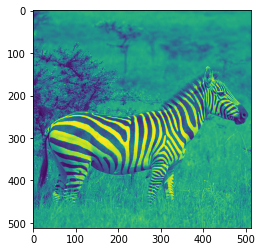

In [6]:
path = ""
filename = "Zebra.jpg"
imageRGB= cv2.imread(path + filename)
imageGRAY = cv2.cvtColor(imageRGB, cv2.COLOR_BGR2GRAY)
plt.imshow(imageGRAY)

print(imageGRAY.shape)

A seguir realize a filtragem da imagem

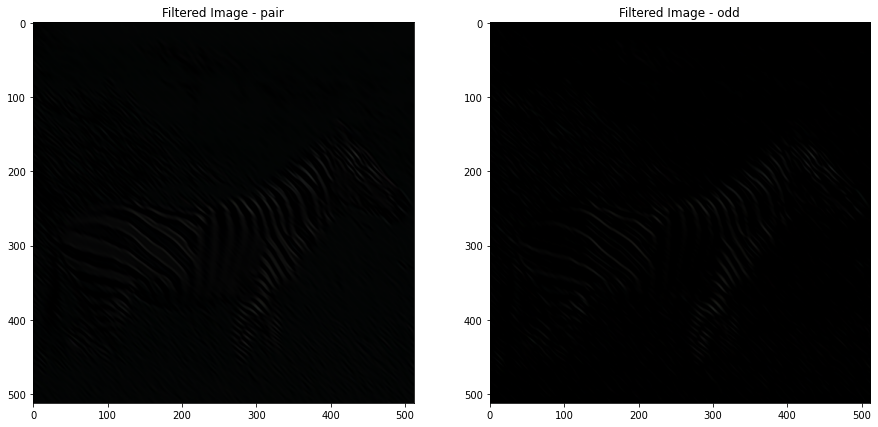

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
filtered_image_pair = cv2.filter2D(imageRGB, -1, g_pair)
plt.imshow(filtered_image_pair, cmap = 'gray')
plt.title('Filtered Image - pair')
plt.subplot(1, 2, 2)
filtered_image_odd = cv2.filter2D(imageRGB, -1, g_odd)
plt.imshow(filtered_image_odd, cmap = 'gray')
plt.title('Filtered Image - odd')
plt.show()

# **2.0 - Filtro de Gabor 2D (domínio frequência)**

No domínio da frequência, o filtro de Gabor 2D normalizado é definido por

$$\begin{aligned}
\Psi(u,v; f_o, \theta, \sigma_u, \sigma_v) = \exp \left(-\pi^2 \left( \frac{u'- f_o}{\sigma_u^2} + \frac{v'}{\sigma_v^2} \right) \right)
\end{aligned}$$

$$\begin{aligned}
u'&= u\cos\theta + v\sin\theta\\
v'&=-u\sin\theta + v\cos\theta\\
\end{aligned}$$

$f_o$ = frequência da onda senoidal

$\theta$ = ângulo de orientação do filtro

$\sigma_u$ e $\sigma_v$ = os desvios padrão da Gaussiana 2D na frequência

**OBS1**: Quando projetamos o filtro no domínio da frequência precisamos fazer com que $u$ e $v$ variem entre -0.5 e 0.5 

**OBS2**: Para efeito de análise, observe que a seguinte relação acontece $\sigma_u = \frac{1}{2\pi \sigma_x}$ e $\sigma_v = \frac{1}{2\pi \sigma_y}$

## **2.1 - Implementação do filtro de Gabor 2D - domínio frequência**

In [8]:
#
# Complex Gabor filter - frequency domain
#
def Gabor_freq_domain(M,N,f,theta,sigma_u,sigma_v):
    u = np.linspace(-M//2, M//2, M) / M
    v = np.linspace(-N//2, N//2, N) / N

    uu, vv = np.meshgrid(u,v)

    u_bar = uu*np.cos(theta) + vv*np.sin(theta)
    v_bar = -uu*np.sin(theta) + vv*np.cos(theta)

    gab = np.exp((-np.pi**2)*((((u_bar-f)**2)/(sigma_u**2)) + ((v_bar**2)/(sigma_v**2))))

    return gab

## **2.2 - Crie o filtro usando os parâmetros abaixo**

Crie um filtro Gabor 2D no domínio da frequência usando os parâmetros abaixo e plote as partes par e ímpar do filtro. 

In [9]:
sigma_u = 1/(2*np.pi*sigma_x)
sigma_v = 1/(2*np.pi*sigma_y)

M = 512
N = 512

gab_freq = Gabor_freq_domain(M,N,frequency,theta,sigma_u,sigma_v)

g_freq_pair = np.real(gab_freq)
g_freq_odd = np.imag(gab_freq)

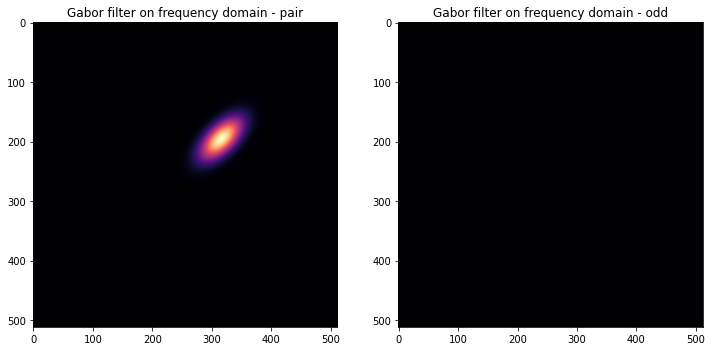

In [10]:
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(g_freq_pair, cmap = 'magma')
plt.title('Gabor filter on frequency domain - pair')
plt.subplot(1, 2, 2)
plt.imshow(g_freq_odd, cmap = 'magma')
plt.title('Gabor filter on frequency domain - odd')
plt.show()

## **2.2 - Filtragem no domínio frequência**

Utilizando o filtro Gabor 2D complexo implementado no domínio da frequência, realize a filtragem da imagem fornecida e **plote a magnitude do espectro de Fourier e a imagem filtrada**.

**DICA**: Para facilitar, crie o filtro com as mesmas dimensões da imagem. 

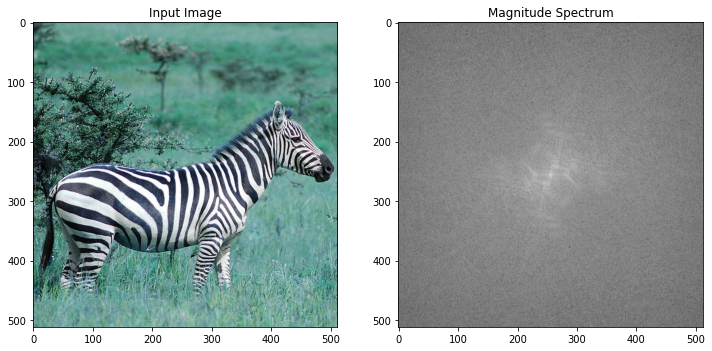

In [11]:
#
# Mostre a imagem da magnitude do espectro de Fourier
#

f_img = np.fft.fft2(imageGRAY)
fshift_img = np.fft.fftshift(f_img)
magnitude_spectrum = 20*np.log(np.abs(fshift_img))

plt.figure(figsize=[12,12])
plt.subplot(121),plt.imshow(imageRGB, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')

plt.show()

In [12]:
#
# Faça a filtragem da imagem no domínio da frequência
#
img_freq = np.fft.fft2(imageGRAY)
shifted_img = np.fft.fftshift(img_freq)

# Convolution at one domain is the same as multiplication on another domain (frequency)
FilteredImage = shifted_img * gab_freq

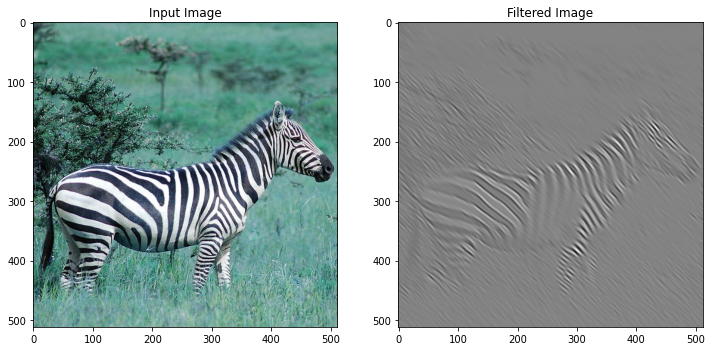

In [13]:
#
# Retorne para o domínio da imagem e mostre a imagem filtrada n
#
ImgYBack_ishift = np.fft.ifftshift(FilteredImage)
ImgBack = np.fft.ifft2(ImgYBack_ishift)
ImgBack = np.real(ImgBack)

plt.figure(figsize=[12,12])
plt.subplot(121),plt.imshow(imageRGB, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(ImgBack, cmap = 'gray')
plt.title('Filtered Image')
plt.show()

# **That's it for now !!**

In [14]:
print("That's it for now !!")

That's it for now !!
